In [10]:
import pandas as pd
from tabulate import tabulate

df = pd.read_csv('Trades_ink_ga.csv', delimiter=';')

# Display the first few rows of the DataFrame
# df.head(20)
print(tabulate(df, headers='keys'))

        day    timestamp  product             bid_price_1    bid_volume_1    bid_price_2    bid_volume_2    bid_price_3    bid_volume_3    ask_price_1    ask_volume_1    ask_price_2    ask_volume_2    ask_price_3    ask_volume_3    mid_price    profit_and_loss
----  -----  -----------  ----------------  -------------  --------------  -------------  --------------  -------------  --------------  -------------  --------------  -------------  --------------  -------------  --------------  -----------  -----------------
   0      1            0  SQUID_INK                  1834              23            nan             nan            nan             nan           1838              23            nan             nan            nan             nan       1836             0
   1      1            0  RAINFOREST_RESIN           9998               9           9995              23            nan             nan          10005              23            nan             nan            nan            

In [11]:
import pandas as pd
from tabulate import tabulate

df_kelp_check = pd.read_csv('Kelp_price_ga.csv', delimiter=';')
df_ink_check = pd.read_csv('Ink_price_ga.csv', delimiter=';')

print(tabulate(df_ink_check, headers='keys'))

        day    timestamp  product             bid_price_1    bid_volume_1    bid_price_2    bid_volume_2    bid_price_3    bid_volume_3    ask_price_1    ask_volume_1    ask_price_2    ask_volume_2    ask_price_3    ask_volume_3    mid_price    profit_and_loss
----  -----  -----------  ----------------  -------------  --------------  -------------  --------------  -------------  --------------  -------------  --------------  -------------  --------------  -------------  --------------  -----------  -----------------
   0      1            0  SQUID_INK                  1834              23            nan             nan            nan             nan           1838              23            nan             nan            nan             nan       1836           0
   1      1            0  RAINFOREST_RESIN           9998               9           9995              23            nan             nan          10005              23            nan             nan            nan             n

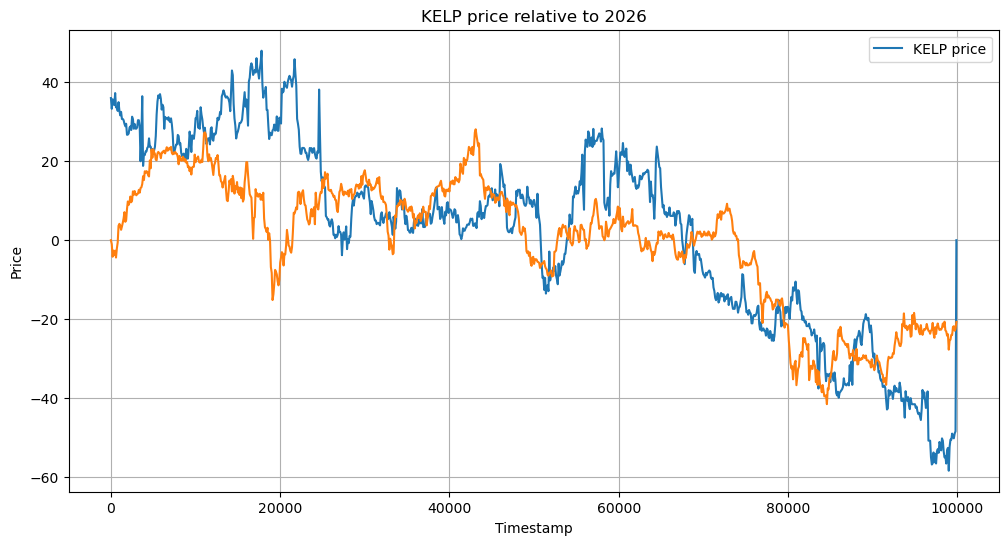

C:\Users\amino\AppData\Local\Temp\ipykernel_6812\3462104599.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


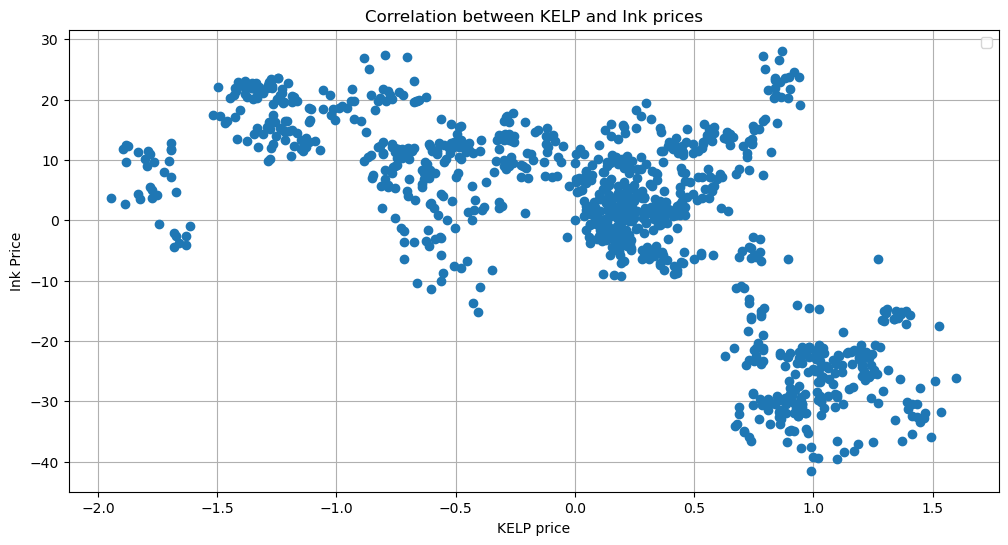

In [22]:
import matplotlib.pyplot as plt

df_kelp = df_kelp_check[df_kelp_check['product'] == 'KELP']
df_ink = df_ink_check[df_ink_check['product'] == 'SQUID_INK']

df_kelp_price = list(df_kelp['profit_and_loss'])
df_ink_price = list(df_ink['profit_and_loss'])

df_kelp_price_reverse = df_kelp_price[::-1]
df_kelp_price_shift = df_kelp_price[1:]

plt.figure(figsize=(12, 6))
plt.plot(df_kelp['timestamp'], [30 * x for x in df_kelp_price_reverse], label='KELP price')
plt.plot(df_ink['timestamp'], df_ink_price)
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('KELP price relative to 2026')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_kelp_price, df_ink_price,'o')
plt.xlabel('KELP price')
plt.ylabel('Ink Price')
plt.title('Correlation between KELP and Ink prices')
plt.legend()
plt.grid(True)
plt.show()

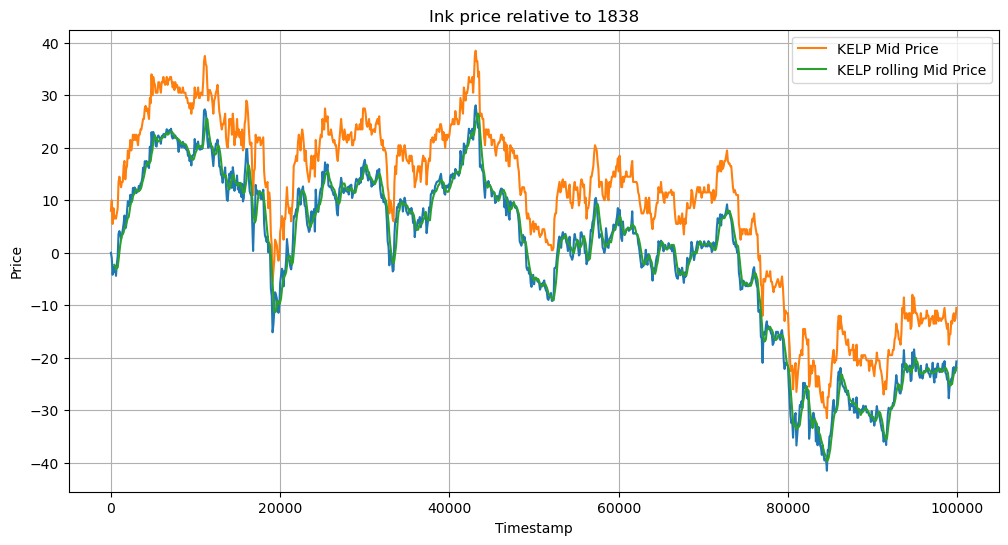

In [13]:
import matplotlib.pyplot as plt


df_ink_mid = [(x - 1828) for x in df_ink['mid_price']]
df_ink_rolling_mid = [(x - 1838) for x in df_ink['mid_price'].rolling(window=5).mean()]

# Plot Ink price relative to 1838

plt.figure(figsize=(12, 6))
plt.plot(df_ink['timestamp'], df_ink['profit_and_loss'])
plt.plot(df_ink['timestamp'], df_ink_mid, label='KELP Mid Price')
plt.plot(df_ink['timestamp'], df_ink_rolling_mid, label='KELP rolling Mid Price')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Ink price relative to 1838')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
import numpy as np
import math

bid_price_1 = list(df_ink['bid_price_1'])
bid_volume_1 = list(df_ink['bid_volume_1'])

bid_price_2 = list(df_ink['bid_price_2'])
bid_volume_2 = list(df_ink['bid_volume_2'])

bid_price_3 = list(df_ink['bid_price_3'])
bid_volume_3 = list(df_ink['bid_volume_3'])

ask_price_1 = list(df_ink['ask_price_1'])
ask_volume_1 = list(df_ink['ask_volume_1'])

ask_price_2 = list(df_ink['ask_price_2'])
ask_volume_2 = list(df_ink['ask_volume_2'])

ask_price_3 = list(df_ink['ask_price_3'])
ask_volume_3 = list(df_ink['ask_volume_3'])

mid_weight = []

for i in range(len(bid_price_1)):
    total_weight = 0
    mid_weight_curr = 0
    if not math.isnan(bid_price_1[i]):
        mid_weight_curr += bid_price_1[i] * bid_volume_1[i]
        total_weight += bid_volume_1[i]
    
    if not math.isnan(bid_price_2[i]):
        mid_weight_curr += bid_price_2[i] * bid_volume_2[i]
        total_weight += bid_volume_2[i]
    
    if not math.isnan(bid_price_3[i]):
        mid_weight_curr += bid_price_3[i] * bid_volume_3[i]
        total_weight += bid_volume_3[i]

    if not math.isnan(ask_price_1[i]):
        mid_weight_curr += ask_price_1[i] * ask_volume_1[i]
        total_weight += ask_volume_1[i]
    
    if not math.isnan(ask_price_2[i]):
        mid_weight_curr += ask_price_2[i] * ask_volume_2[i]
        total_weight += ask_volume_2[i]
    
    if not math.isnan(ask_price_3[i]):
        mid_weight_curr += ask_price_3[i] * ask_volume_3[i]
        total_weight += ask_volume_3[i]

    mid_weight.append(mid_weight_curr / total_weight if total_weight != 0 else 0)
    


C:\Users\amino\AppData\Local\Temp\ipykernel_6812\1529517898.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


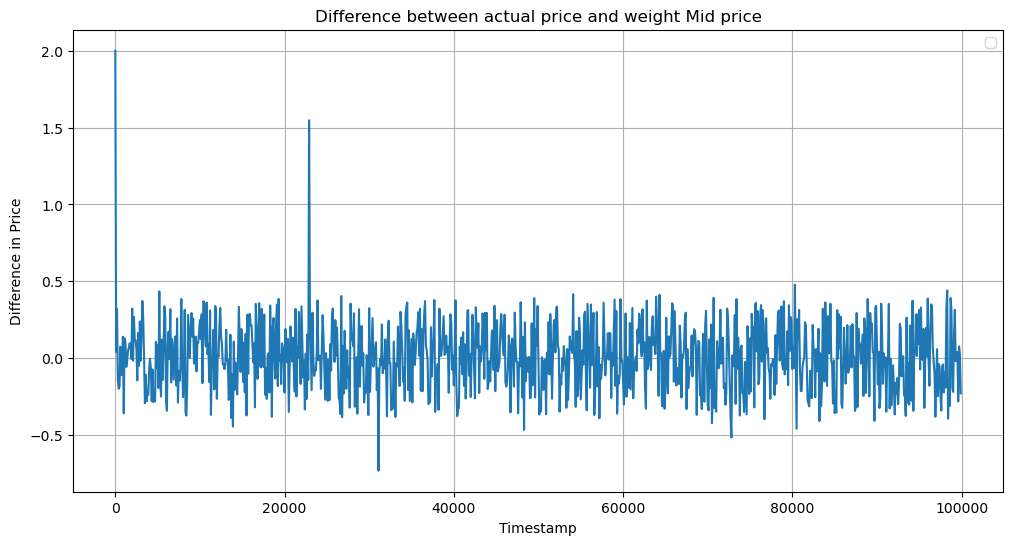

In [15]:
df_ink = df_ink_check[df_ink_check['product'] == 'SQUID_INK']
time = df_ink['timestamp']

df_ink_weighted_mid = [(x) for x in mid_weight]


df_ink_mid_diff = [(list(df_ink['profit_and_loss'])[i]  + 1838 - df_ink_weighted_mid[i]) for i in range(len(time))]

plt.figure(figsize=(12, 6))
plt.plot(time, df_ink_mid_diff)
plt.xlabel('Timestamp')
plt.ylabel('Difference in Price')
plt.title('Difference between actual price and weight Mid price')
plt.legend()
plt.grid(True)
plt.show()

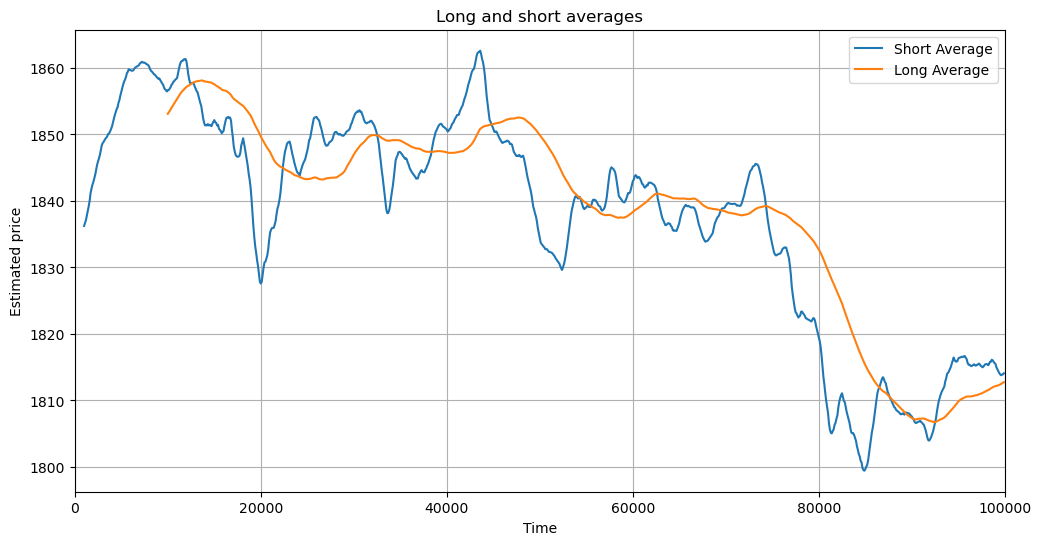

C:\Users\amino\AppData\Local\Temp\ipykernel_6812\1112197.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


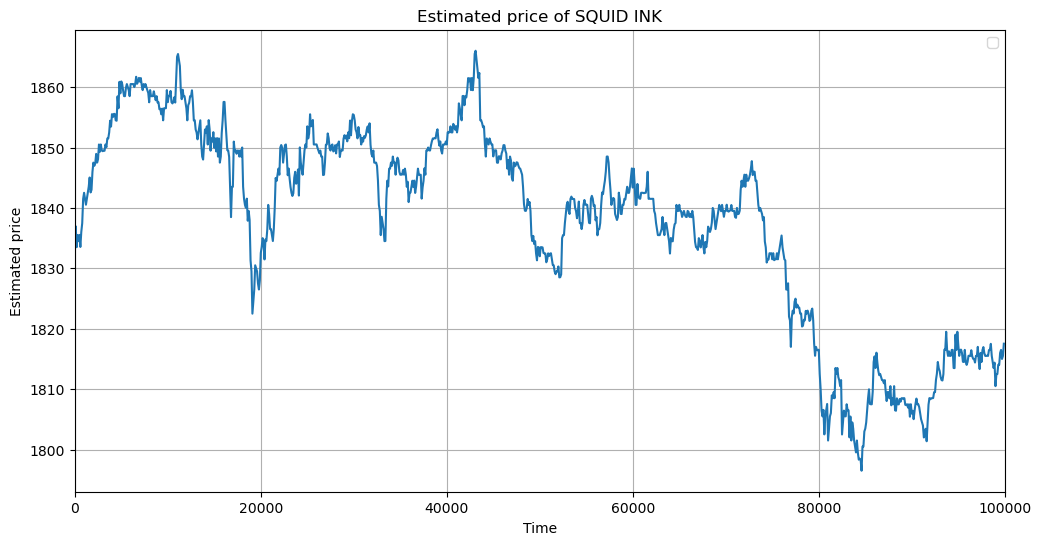

In [16]:
len_long = 100
len_short = 10

average_long = []
time_long = []

average_short = []
time_short = []

df_ink_actual_price = [x + 1838 for x in df_ink['profit_and_loss']]
time_lst = list(df_ink['timestamp'])

for i in range(len_long,len(df_ink_actual_price)):
    average_long.append(sum(df_ink_actual_price[i-len_long:i]) / len_long)
    time_long.append(time_lst[i])

for i in range(len_short,len(df_ink_actual_price)):
    average_short.append(sum(df_ink_actual_price[i-len_short:i]) / len_short)
    time_short.append(time_lst[i])


plt.figure(figsize=(12, 6))
plt.plot(time_short,average_short, label='Short Average')
plt.plot(time_long,average_long, label='Long Average')
plt.xlabel('Time')
plt.ylabel('Estimated price')
plt.title('Long and short averages')
plt.legend()
plt.grid(True)
plt.xlim(0, 100000)
#plt.ylim(1940, 2000)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(time_lst,df_ink_weighted_mid)
#plt.plot(time_short,average_short)
plt.xlabel('Time')
plt.ylabel('Estimated price')
plt.title('Estimated price of SQUID INK')
plt.legend()
plt.grid(True)
plt.xlim(0, 100000)
#plt.ylim(1800, 1810)
plt.show()

C:\Users\amino\AppData\Local\Temp\ipykernel_6812\3580091474.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


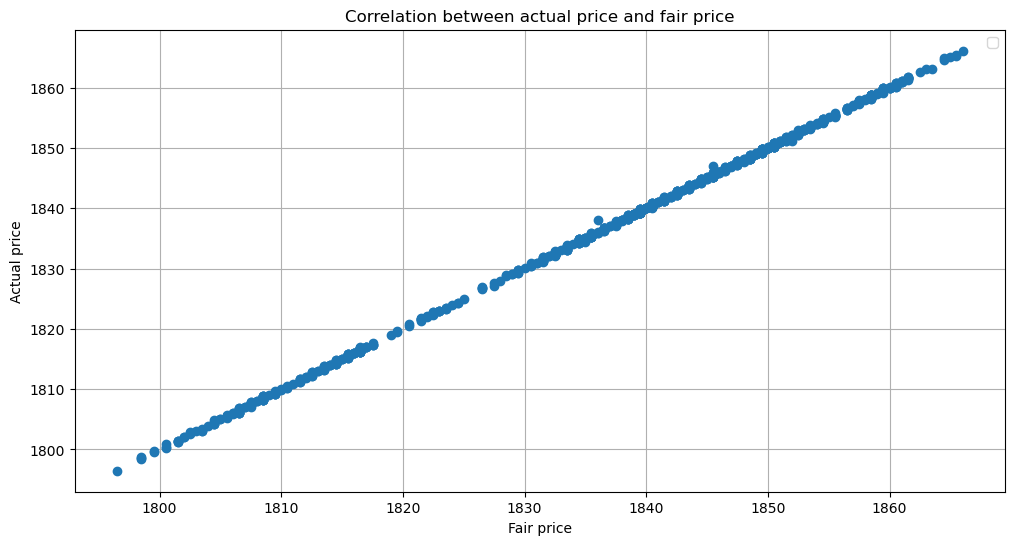

C:\Users\amino\AppData\Local\Temp\ipykernel_6812\3580091474.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


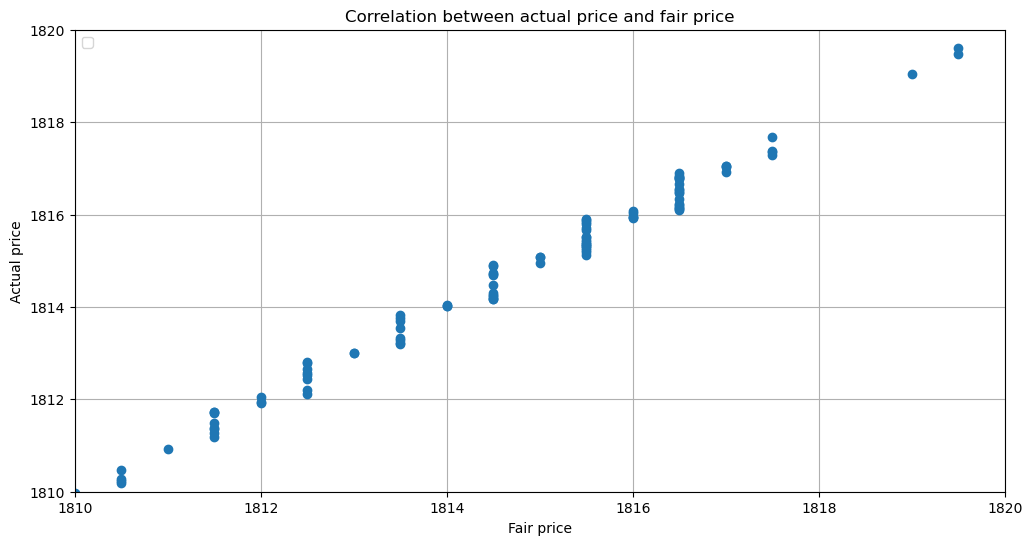

In [17]:
time_labels = list(df_ink['timestamp'])

fprice_lst = [round(2*x)/2 for x in df_ink_weighted_mid]

df_ink_actual_price = [x + 1838 for x in df_ink['profit_and_loss']]

plt.figure(figsize=(12, 6))
plt.plot(fprice_lst,df_ink_actual_price,'o')

#for i, label in enumerate(time_labels):
#    plt.annotate(label/100, (fprice_lst[i], df_ink_actual_price[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.xlabel('Fair price')
plt.ylabel('Actual price')
plt.title('Correlation between actual price and fair price')
plt.legend()
plt.grid(True)
#plt.xlim(1810, 1820)
#plt.ylim(1810, 1820)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(fprice_lst,df_ink_actual_price,'o')
plt.xlabel('Fair price')
plt.ylabel('Actual price')
plt.title('Correlation between actual price and fair price')
plt.legend()
plt.grid(True)
plt.xlim(1810, 1820)
plt.ylim(1810, 1820)
plt.show()


In [18]:

above_fprice = []
below_fprice = []

for x in fprice_lst:
    if x.is_integer():
        above_fprice.append(int(x + 1))
        below_fprice.append(int(x - 1))
    else:
        above_fprice.append(math.ceil(x + 0.5))
        below_fprice.append(math.floor(x - 0.5))

print(list(fprice_lst))
print(list(above_fprice))

Num_prob = 0
for i in range(len(fprice_lst)):
    if np.random.rand() < 0.05:
        Num_prob += 1

print('Event with prob 5% occured ',Num_prob, ' times in ',len(fprice_lst), 'trials')

[1836.0, 1837.0, 1833.5, 1835.5, 1834.5, 1835.5, 1833.5, 1836.0, 1837.5, 1841.5, 1842.5, 1841.5, 1840.5, 1841.5, 1842.5, 1843.5, 1845.0, 1842.5, 1843.0, 1846.0, 1847.5, 1847.0, 1847.5, 1849.0, 1847.5, 1848.0, 1850.5, 1849.5, 1850.5, 1849.5, 1849.5, 1849.5, 1849.5, 1850.5, 1850.0, 1851.5, 1851.5, 1852.5, 1854.5, 1853.5, 1855.5, 1855.0, 1855.5, 1855.5, 1854.5, 1854.5, 1858.5, 1856.5, 1861.0, 1859.0, 1861.0, 1860.5, 1859.5, 1858.5, 1858.5, 1860.0, 1860.5, 1860.0, 1859.5, 1858.5, 1860.5, 1860.5, 1860.5, 1860.5, 1860.0, 1860.5, 1861.5, 1860.5, 1861.0, 1861.5, 1861.0, 1861.5, 1860.5, 1859.5, 1860.5, 1860.0, 1860.5, 1860.0, 1859.5, 1859.0, 1857.5, 1859.5, 1858.5, 1858.5, 1858.5, 1859.5, 1858.5, 1858.0, 1858.5, 1857.5, 1857.5, 1856.5, 1856.5, 1855.5, 1856.5, 1854.5, 1856.5, 1856.5, 1856.5, 1859.5, 1857.5, 1858.5, 1858.5, 1859.5, 1857.5, 1857.5, 1857.5, 1858.5, 1857.5, 1861.0, 1865.0, 1865.5, 1864.5, 1863.5, 1859.5, 1858.0, 1859.5, 1858.5, 1858.5, 1857.5, 1856.5, 1854.5, 1857.0, 1857.5, 1858.5,

C:\Users\amino\AppData\Local\Temp\ipykernel_6812\374565418.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


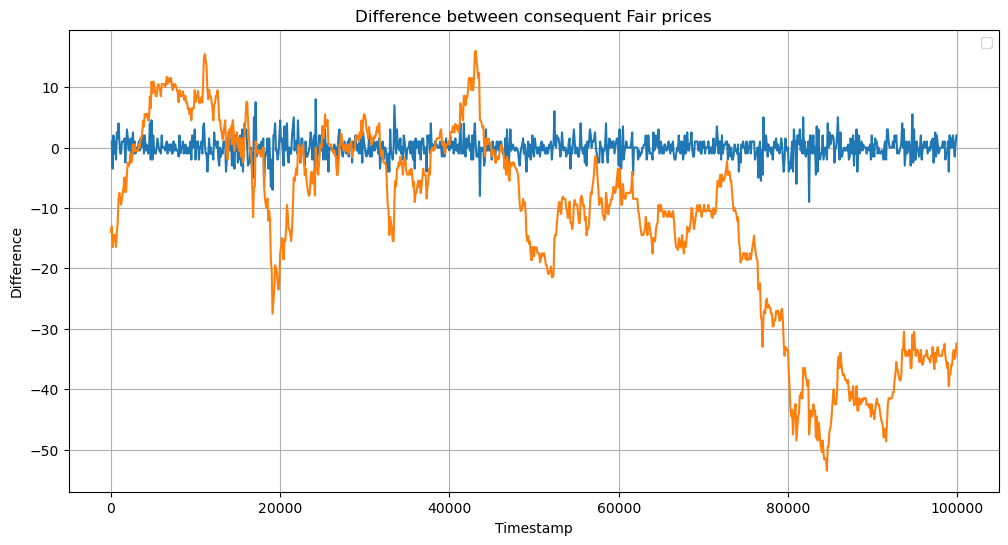

C:\Users\amino\AppData\Local\Temp\ipykernel_6812\374565418.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


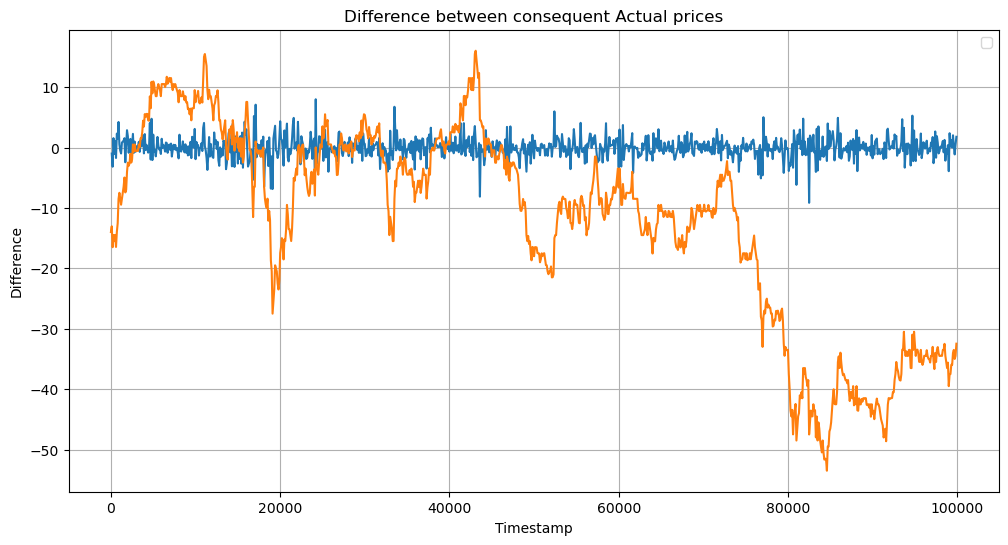

In [19]:
time_ink = list(df_ink['timestamp'])

fprice_diff = [fprice_lst[i] - fprice_lst[i-1] for i in range(1,len(fprice_lst))]
time = [time_ink[i] for i in range(1,len(time_ink))]

plt.figure(figsize=(12, 6))
plt.plot(time, fprice_diff)
plt.plot(time_lst,[x - 1850 for x in df_ink_weighted_mid])
plt.xlabel('Timestamp')
plt.ylabel('Difference')
plt.title('Difference between consequent Fair prices')
plt.legend()
plt.grid(True)
#plt.ylim(-2.5, 2.5)
plt.show()

aprice_diff = [df_ink_actual_price[i] - df_ink_actual_price[i-1] for i in range(1,len(df_ink_actual_price))]

plt.figure(figsize=(12, 6))
plt.plot(time, aprice_diff)
plt.plot(time_lst,[x - 1850 for x in df_ink_weighted_mid])
plt.xlabel('Timestamp')
plt.ylabel('Difference')
plt.title('Difference between consequent Actual prices')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\amino\AppData\Local\Temp\ipykernel_23620\1053965769.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


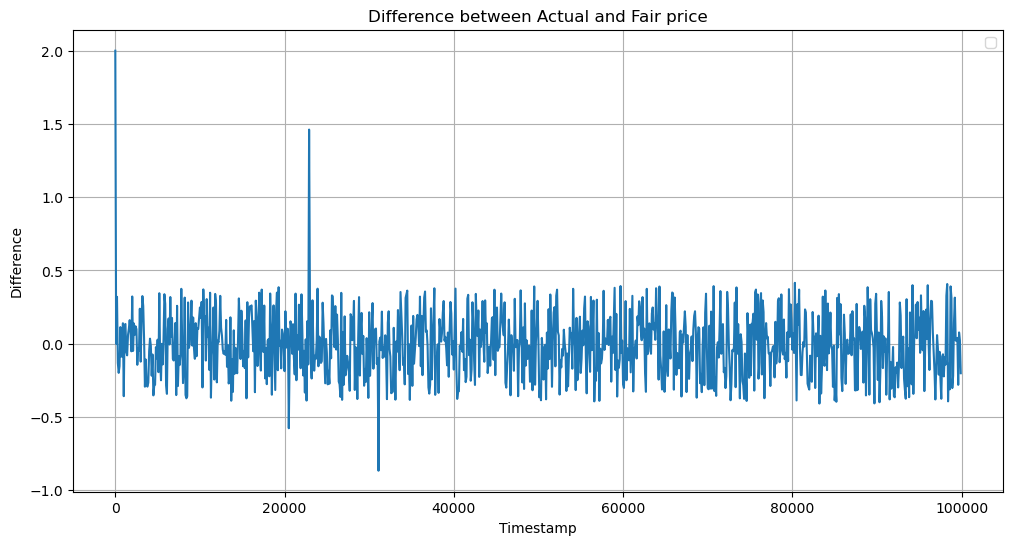

In [72]:
actual_fprice_diff = [df_ink_actual_price[i] - fprice_lst[i] for i in range(len(fprice_lst))]
time_ink = df_ink['timestamp']

plt.figure(figsize=(12, 6))
plt.plot(time_ink, actual_fprice_diff)
plt.xlabel('Timestamp')
plt.ylabel('Difference')
plt.title('Difference between Actual and Fair price')
plt.legend()
plt.grid(True)
plt.show()


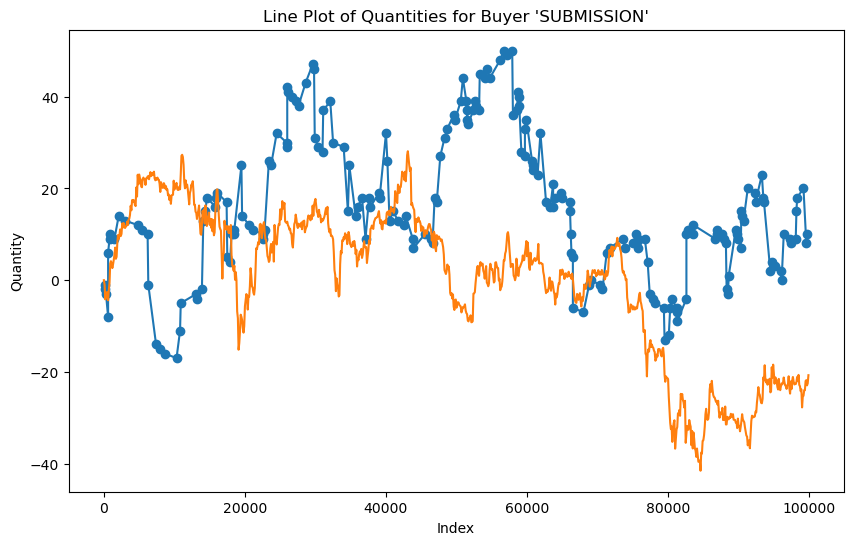

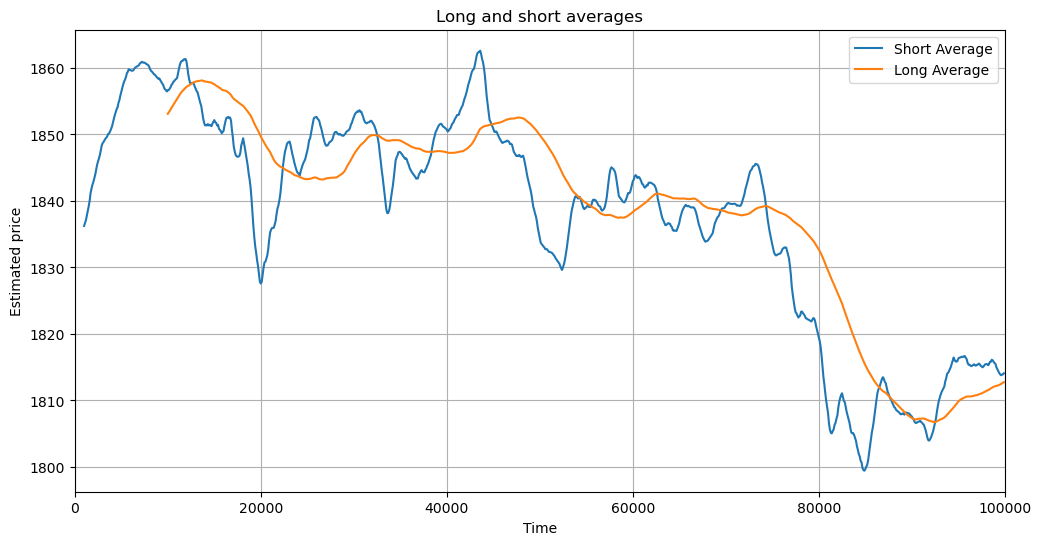

In [24]:
import json
import matplotlib.pyplot as plt

filename = "Log_ink_ga.log"
json_str = ""
found = False

with open(filename, "r") as f:
    # Read lines until we find the marker "Trade History:"
    for line in f:
        if "Trade History:" in line:
            # If the same line contains the opening bracket, use it
            if "[" in line:
                json_str = line[line.find("["):]
            else:
                # Otherwise, assume the next line starts the JSON array
                json_str = next(f)
            found = True
            break

    if not found:
        raise ValueError("Could not find 'Trade History:' with '[' in file.")

    # Append the remainder of the file to the JSON string
    json_str += f.read()

# Parse the JSON string into a list of trade objects
data = json.loads(json_str)

# Calculate the total quantity and total money paid for buyer "SUBMISSION"
quantities = []
time_lst = []
quantity = 0
for item in data:
    if item.get("buyer") == "SUBMISSION":
        quantity += item.get("quantity", 0)
        quantities.append(quantity)
        timestamp = item.get("timestamp", 0)
        time_lst.append(timestamp)
    elif item.get("seller") == "SUBMISSION":
        quantity -= item.get("quantity", 0)
        quantities.append(quantity)
        timestamp = item.get("timestamp", 0)
        time_lst.append(timestamp)


# Plot the quantities as a line plot
plt.figure(figsize=(10, 6))
plt.plot(time_lst, quantities, marker='o', linestyle='-')
plt.plot(df_ink['timestamp'], df_ink['profit_and_loss'])
plt.xlabel("Index")
plt.ylabel("Quantity")
plt.title("Line Plot of Quantities for Buyer 'SUBMISSION'")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(time_short,average_short, label='Short Average')
plt.plot(time_long,average_long, label='Long Average')
plt.xlabel('Time')
plt.ylabel('Estimated price')
plt.title('Long and short averages')
plt.legend()
plt.grid(True)
plt.xlim(0, 100000)
#plt.ylim(1940, 2000)
plt.show()

In [111]:
ind = 40

time_ink = list(df_ink['timestamp'])

print('Time = ',time_ink[ind])
print('Fair and predicted prices: ',[fprice_lst[ind],df_ink_actual_price[ind]])

print('Max bid price and volume: ',[bid_price_1[ind],bid_volume_1[ind]])
print('Min ask price and volume: ',[ask_price_1[ind],ask_volume_1[ind]])

Time =  4000
Fair and predicted prices:  [1855.5, 1855.4503173828125]
Max bid price and volume:  [1854, 30]
Min ask price and volume:  [1857, 31]
